# Tarea Redes Neuronales
## Grupos de 3 personas
### Entregas atrasadas pierden 1 punto por hora. Si alguien entrega a las 00:00:01 implica que pierde 1 punto en la nota final. Recomendación, entregue una versión inicial cerca de las 22 horas y luego suba las modificaciones.

La NASA mantiene la información de varios cometas y quiere determinar alguna manera de predecir el diametro de un cometa. Específicamente, han analizado en forma manual una muestra de 100,000 asteroides. Los datos consisten en 26 variables, con distinta información como por ejemplo nombre del asteroide, su periodo orbital, su periodo de rotación, etc. Todos los datos existentes, se encuentran en un puro archivo llamado asteroidTrain.csv. Mientras que las descripciones de cada una de las variables se encuentran en el archivo tareaInformacion.txt

Desafortunadamente, la NASA todavía no ha evaluado 37.681 asteroides y no tienen tiempo para realizarlo. Por lo mismo, le piden que aplique una red neuronal feed forward para obtener una predicción de estos asteroides.

1. Lea los datos y borre las variables/asteroides que estime necesario. En caso que crea que la base de datos todavía es demasiado grande para aplicar una red neruonal, usted puede tomar una muestra de la misma. NOTA, justifique cada una de las decisiones tomadas, el puntaje principal se basa en las justificaciones. Una vez generado estos datos, guarde la base de datos final en un nuevo archivo csv (1.5 puntos).
2. Entrene un modelo feed forward. Realice una busqueda de hiperparámetros incluyendo número de capas, número de  neuronas, funciones de activación, epocas, etc. Seleccione un modelo final (justificando a través de una evaluación correcta los hiperarametros seleccionados (2.5 puntos). NOTA, justifique cada una de las decisiones tomadas, el puntaje principal se basa en las justificaciones. 
3. Utilice el modelo seleccionado en el punto anterior y evalue los 37,681 asteroides que la NASA no ha evaluado. En este proceso genere un archivo csv de una sola columna con 37,681 filas donde cada celda tendrá el valor del cometa a predecir (2 puntos). Atención, si ustedes entrega un archivo con un número distinto de filas, de igual manera se evaluará las 37,681 filas.

El punto de evaluación final será una competencia entre todas las tareas basados en los MSE más bajos y altos obtenido por cada grupo. El puntaje final será una regresión lineal entre un modelo muy básico y el mejor puntaje.

Para esta entrega usted deberá entregar 4 archivos
1. Un archivo ipynb que muestre todo el proceso de selección de variables y limpieza de datos aplicados. Además, deberá mostrar la búsqueda de hiperparametros. Este archivo ya deberá haber sido ejecutado y cuando se cargué uno debera ver todo el proceso de ejecución. 
2. Un nuevo archivo CSV que contenga la base de datos luego de la limpieza generada en el primer punto de la tarea.
3. Un archivo ipynb limpio que simplemente cargue la nueva base de datos, entrene el modelo con los hiperparametros seleccionados y genere el archivo csv con las 37,681 estimaciones. Este archivo permitirá ver la replicabilidad de su archivo csv. 
4. Un archivo csv con las 37,681 estimaciones realizadas para el modelo.

In [211]:
import numpy as np
import pandas as pd
from plotnine import *
import sklearn as sk
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [212]:
#importamos los set de datos de evaluacion y de entrenamiento
train_data = pd.read_csv('asteroidTrain.csv') 
train_data = train_data.dropna(axis=1)
#aplicamos onehotencoder a las variables categoricas
neo_ohe = pd.get_dummies(train_data.neo,prefix = 'neo')
pha_ohe = pd.get_dummies(train_data.pha,prefix = 'pha')
#transformamos la data nuevamente
train_data = pd.concat([train_data,neo_ohe,pha_ohe],axis=1)
#eliminamos las columnas que no nos interesan
#eliminamos las columnas de color
train_data.drop(['n_obs_used','condition_code','neo','pha','per_y','full_name'], axis=1, inplace=True)

#printeamos los primeros datos
print(train_data)

              a         e          i          om           w         q  \
0      3.069866  0.184417   3.620920  308.458533  249.570070  2.503729   
1      2.386539  0.104566  13.003513  105.866881  329.104052  2.136988   
2      3.018175  0.084529  14.247933  245.449168  115.242451  2.763053   
3      2.793049  0.290215  16.677722   17.862425  287.769691  1.982465   
4      2.721394  0.098602   1.975506  271.706257  248.448520  2.453059   
...         ...       ...        ...         ...         ...       ...   
99995  3.161511  0.166092  28.442710  224.796987    2.422644  2.636410   
99996  2.715932  0.239266  16.789523   34.531718   44.097353  2.066102   
99997  3.188786  0.278970  15.177104  188.342499  255.934423  2.299209   
99998  2.754535  0.106028   8.758664  230.483443   34.567890  2.462477   
99999  3.940892  0.241022   9.495628  192.657992  197.808221  2.991051   

             ad diameter     moid  neo_N  neo_Y  pha_N  pha_Y  
0      3.636003    6.611  1.50522      1      0

C:\Users\maxho\AppData\Local\Temp\ipykernel_808\519193104.py:2: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.


Al ser netamente variables numericas no hay que modificarlas en el sentido de que hay que hacer alguna trasnformacion a los datos.

**poner la justificacion

In [213]:
#Creando y entrenando un modelo
from sklearn.neural_network import MLPRegressor
#creamos el traindata sin la columna de diametro
train_data_sin_diameter = train_data.drop(['diameter'], axis=1)
#creamos el modelo
modelo = MLPRegressor(hidden_layer_sizes=(10,),batch_size='auto',learning_rate_init=0.001,max_iter=50)
#hacemos un fit a los datos de entrenamiento
modelo.fit(train_data_sin_diameter, train_data['diameter'])


C:\Users\maxho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.


MLPRegressor(hidden_layer_sizes=(10,), max_iter=50)

In [214]:
print("Función de activicación de salida",modelo.out_activation_)
#Error final del modelo (entrenamiento)
print("Error de entrenamiento final:",modelo.loss_)
#Mejor error del modelo (entrenamiento)
print("Mejor error de entrenamiento:",modelo.best_loss_)

Función de activicación de salida identity
Error de entrenamiento final: 37.045598367189484
Mejor error de entrenamiento: 37.02304329728057


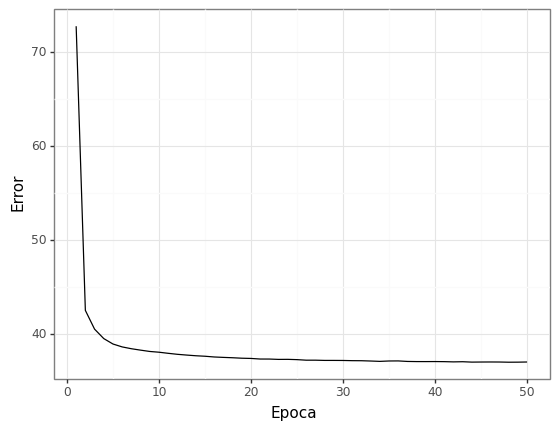

<ggplot: (168445617143)>

In [215]:
#Curva de aprendizaje
tempDF=pd.DataFrame(modelo.loss_curve_,columns=["Error"])
tempDF["Epoca"]=range(1,tempDF.shape[0]+1)
ggplot(tempDF)+aes(x="Epoca",y="Error")+theme_bw()+geom_line()

In [216]:
#importamos los set de datos de evaluacion y de entrenamiento
Eval_data = pd.read_csv('asteroidEval.csv') 
Eval_data = Eval_data.dropna(axis=1)
#aplicamos onehotencoder a las variables categoricas
neo_ohe1 = pd.get_dummies(Eval_data.neo,prefix = 'neo')
pha_ohe1 = pd.get_dummies(Eval_data.pha,prefix = 'pha')
#transformamos la data nuevamente
Eval_data = pd.concat([Eval_data,neo_ohe1,pha_ohe1],axis=1)
Eval_data.drop(['n_obs_used','condition_code','neo','pha','per_y','full_name'], axis=1, inplace=True)

#printeamos los primeros datos
print(Eval_data)

              a         e          i          om           w         q  \
0      3.969733  0.082587   6.263280  159.529531  338.904665  3.641886   
1      2.262880  0.096618  22.340191   52.502912   87.172523  2.044245   
2      3.072270  0.103533   9.503231  217.293949  191.020252  2.754189   
3      2.766916  0.208954  10.208236  161.123803  188.856431  2.188758   
4      2.361788  0.259924   9.486384  100.768260  231.685109  1.747903   
...         ...       ...        ...         ...         ...       ...   
37676  3.948805  0.121336  12.100826  176.921861  253.018391  3.469671   
37677  2.985065  0.085091   9.437864  165.845432   49.880238  2.731062   
37678  2.250727  0.146572   4.952574  136.066108  218.906512  1.920834   
37679  2.692312  0.182102  14.004905  177.379901   92.464686  2.202038   
37680  2.976344  0.086984  12.570232   90.159809  275.399609  2.717450   

             ad      moid  neo_N  neo_Y  pha_N  pha_Y  
0      4.297579  2.656530      1      0      1      0  

C:\Users\maxho\AppData\Local\Temp\ipykernel_808\3458253949.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.


In [219]:
#ocupamos el modelo para predecir el diametro de un asteroide
print(modelo.predict(train_data_sin_diameter))
X = modelo.predict(Eval_data)
#cree un csv de una sola columna con la variable X
X = pd.DataFrame(X)
X.to_csv('X.csv', index=False, header=False)



[6.1773406  2.39894309 7.35636672 ... 5.59576747 5.85971435 9.52879431]
